In [77]:
from sklearn import neighbors
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from seaborn import pairplot, color_palette
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dataclasses import dataclass
from math import sqrt
from collections import Counter

In [78]:
@dataclass
class Dataset:
    data_inp: 'list[list[float]]'
    data_out: 'list[float]'
    classes: list[str]

In [79]:
class KNNClassifier:
    def __init__(self, k: int, dataset: Dataset, weights: list[float] = None):
        self.k = k
        self.dataset = dataset
        self.dimensions = len(dataset.data_inp[0])
        self.weights = weights if weights != None else [1] * self.dimensions
        if len(self.weights) != self.dimensions:
            raise Exception(f"Expected {self.dimensions} weights but got {len(self.weights)}")

    def euclidean_distance(self, p1: list[float], p2: list[float]) -> float:
        return sqrt(sum([w * ((v1 - v2) ** 2) for w, v1, v2 in zip(self.weights, p1, p2)]))

    def classify(self, point: list[float]) -> int:
        if len(point) != self.dimensions:
            raise Exception(f"Points with wrong dimensions. Should be {self.dimensions}d instead got {len(point)}d")
        distances = sorted(((int(cl), self.euclidean_distance(point, dp)) for cl, dp in zip(self.dataset.data_out, self.dataset.data_inp)), key=lambda x: x[1])[:self.k]
        return Counter(cl for cl, _ in distances).most_common(1)[0][0]
        

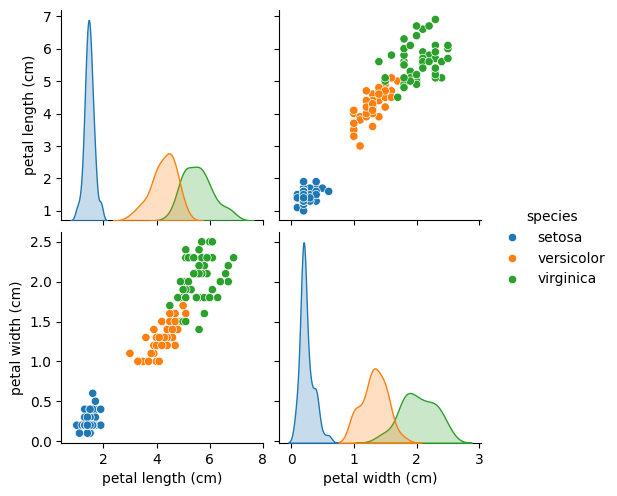

In [80]:
dataset: dict[str, pd.DataFrame] = load_iris(as_frame=True)
data: pd.DataFrame = dataset['data'].iloc[:,-2:]
results = dataset['target']
classes = dataset['target_names'].tolist()

to_plot = data.copy()
to_plot.insert(len(to_plot.columns), 'species', [dataset['target_names'][i] for i in dataset['target']], True)

pairplot(to_plot, hue='species')

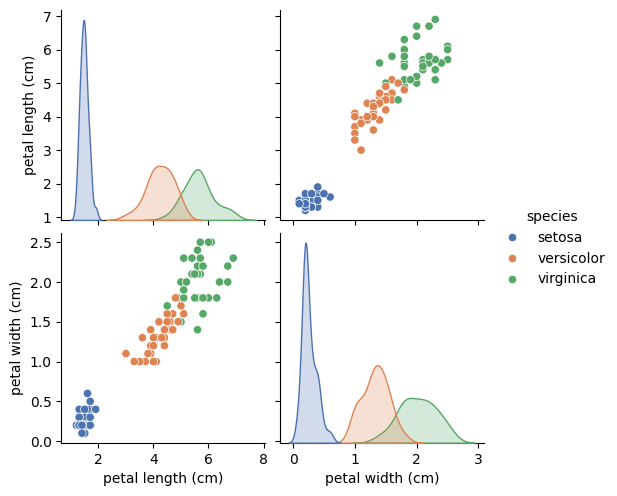

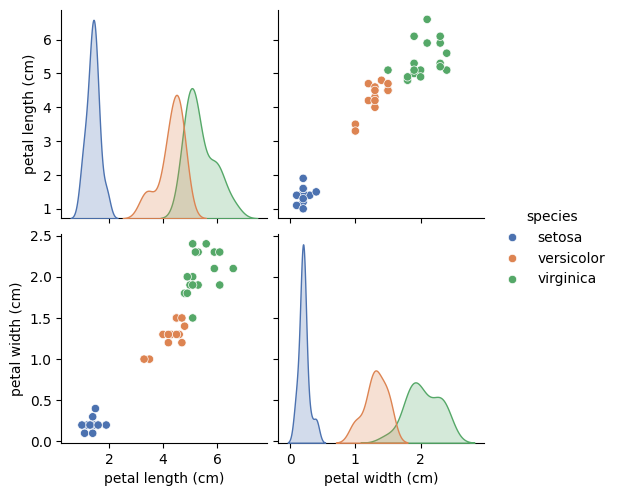

In [81]:
train_inp, test_inp, train_out, test_out = train_test_split(data, dataset['target'], test_size=.3)

pal = color_palette("deep", n_colors=3)


train_plot = train_inp.copy()
train_plot.insert(len(train_plot.columns), 'species', [dataset['target_names'][i] for i in train_out], True)
a = pairplot(train_plot, hue='species', hue_order=dataset['target_names'], palette=pal)

test_plot = test_inp.copy()
test_plot.insert(len(test_plot.columns), 'species', [dataset['target_names'][i] for i in test_out], True)
pairplot(test_plot, hue='species', hue_order=dataset['target_names'], palette=pal)

In [88]:
# dataset_obj = Dataset(train_inp.values.tolist(), train_out.values.tolist(), classes)
dataset_obj = Dataset(data.values.tolist(), results.values.tolist(), classes)
print(dataset_obj)
weights = None

classifier = KNNClassifier(3, dataset_obj, weights=weights)
classifier

Dataset(data_inp=[[1.4, 0.2], [1.4, 0.2], [1.3, 0.2], [1.5, 0.2], [1.4, 0.2], [1.7, 0.4], [1.4, 0.3], [1.5, 0.2], [1.4, 0.2], [1.5, 0.1], [1.5, 0.2], [1.6, 0.2], [1.4, 0.1], [1.1, 0.1], [1.2, 0.2], [1.5, 0.4], [1.3, 0.4], [1.4, 0.3], [1.7, 0.3], [1.5, 0.3], [1.7, 0.2], [1.5, 0.4], [1.0, 0.2], [1.7, 0.5], [1.9, 0.2], [1.6, 0.2], [1.6, 0.4], [1.5, 0.2], [1.4, 0.2], [1.6, 0.2], [1.6, 0.2], [1.5, 0.4], [1.5, 0.1], [1.4, 0.2], [1.5, 0.2], [1.2, 0.2], [1.3, 0.2], [1.4, 0.1], [1.3, 0.2], [1.5, 0.2], [1.3, 0.3], [1.3, 0.3], [1.3, 0.2], [1.6, 0.6], [1.9, 0.4], [1.4, 0.3], [1.6, 0.2], [1.4, 0.2], [1.5, 0.2], [1.4, 0.2], [4.7, 1.4], [4.5, 1.5], [4.9, 1.5], [4.0, 1.3], [4.6, 1.5], [4.5, 1.3], [4.7, 1.6], [3.3, 1.0], [4.6, 1.3], [3.9, 1.4], [3.5, 1.0], [4.2, 1.5], [4.0, 1.0], [4.7, 1.4], [3.6, 1.3], [4.4, 1.4], [4.5, 1.5], [4.1, 1.0], [4.5, 1.5], [3.9, 1.1], [4.8, 1.8], [4.0, 1.3], [4.9, 1.5], [4.7, 1.2], [4.3, 1.3], [4.4, 1.4], [4.8, 1.4], [5.0, 1.7], [4.5, 1.5], [3.5, 1.0], [3.8, 1.1], [3.7, 1.0]

In [89]:
print(data)
x_min, x_max = data.iloc[:, 0].min() - 1, data.iloc[:, 0].max() + 1
y_min, y_max = data.iloc[:, 1].min() - 1, data.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

xx.shape

     petal length (cm)  petal width (cm)
0                  1.4               0.2
1                  1.4               0.2
2                  1.3               0.2
3                  1.5               0.2
4                  1.4               0.2
..                 ...               ...
145                5.2               2.3
146                5.0               1.9
147                5.2               2.0
148                5.4               2.3
149                5.1               1.8

[150 rows x 2 columns]


(44, 79)

In [90]:
z = [classifier.classify([x, y]) for x, y in zip(xx.ravel(), yy.ravel())]

z = np.array(z).reshape(xx.shape)
z

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

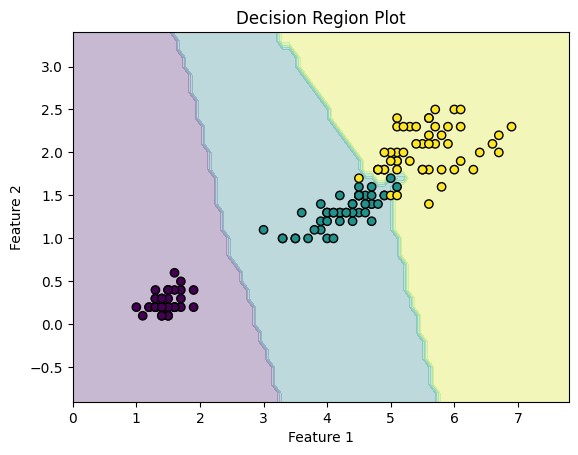

In [92]:
plt.contourf(xx, yy, z, alpha=.3)
plt.scatter(data.values[:, 0], data.values[:, 1], c=results, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Decision Region Plot")
plt.show()

In [30]:
predictions = [classifier.classify(point) for point in test_inp.values]
print(classification_report(test_out, predictions, target_names=classes))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.93      0.93      0.93        15
   virginica       0.95      0.95      0.95        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

